# Model Interpretability 
Ping Chen

# 1.Implement library and data preprocessing

In [1]:
!apt-get install default-jre 
!java -version
! pip install h2o
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.5 MB 33 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.3-py2.py3-none-any.whl size=177541401 sha256=458ffc1eb1de87084592b8a5dfca7a6d21e2fca1d47305eef238b34e7314bcbc
  Stored in directory: /root/.cache/pip/wheels/16/f8/f4/69e1ff6a0d1cb61bdbc0d9888ee843

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp56opkswu
  JVM stdout: /tmp/tmp56opkswu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp56opkswu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_unknownUser_1uyarw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
url = "https://raw.githubusercontent.com/ChenPingA/Air-Quality-Data-Set/main/AirQualityUCI.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
# return an output of the dataframe
df.head()

Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C16,C17
2004-03-10 00:00:00,1970-01-01 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,nan,nan
2004-03-10 00:00:00,1970-01-01 19:00:00,2,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,nan,nan
2004-03-10 00:00:00,1970-01-01 20:00:00,2.2,1402,88,9,939,131,1140,114,1555,1074,11.9,54,0.7502,nan,nan
2004-03-10 00:00:00,1970-01-01 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11,60,0.7867,nan,nan
2004-03-10 00:00:00,1970-01-01 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,nan,nan
2004-03-10 00:00:00,1970-01-01 23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,nan,nan
2004-03-11 00:00:00,1970-01-01 00:00:00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603,nan,nan
2004-03-11 00:00:00,1970-01-01 01:00:00,1,1136,31,3.3,672,62,1453,76,1333,730,10.7,60,0.7702,nan,nan
2004-03-11 00:00:00,1970-01-01 02:00:00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648,nan,nan
2004-03-11 00:00:00,1970-01-01 03:00:00,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517,nan,nan


In [6]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [8]:
df.describe()

Rows:9471
Cols:17

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C16,C17
type,time,time,real,int,int,real,int,int,int,int,int,int,real,real,real,int,int
mins,1078876800000.0,0.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,NaN,NaN
mean,1095741005193.9729,41394806.027572945,-34.20752377898901,1048.990060916961,-159.09009297851875,1.8656834455487874,894.5952762637594,168.61697125146938,794.990167788821,58.148872501870244,1391.4796409105481,975.0720316340708,9.77830501229027,39.48537992946456,-6.837603644330444,0.0,0.0
maxs,1112572800000.0,82800000.0,11.9,2040.0,1189.0,63.7,2214.0,1479.0,2683.0,340.0,2775.0,2523.0,44.6,88.7,2.231,NaN,NaN
sigma,9724648294.22172,24923453.80027478,77.65717034683163,329.8327098861881,139.78909289678148,41.38020643630012,342.3332516496718,257.4338662910737,321.99355160311603,126.9404552589075,467.21012455706364,456.93818447398843,43.203623062623194,51.21614497176605,38.97667016632423,-0.0,-0.0
zeros,0,390,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
missing,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,9471,9471
0,2004-03-10 00:00:00,1970-01-01 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,nan,nan
1,2004-03-10 00:00:00,1970-01-01 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,nan,nan
2,2004-03-10 00:00:00,1970-01-01 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,nan,nan


There are many one value in the dataset , we need to drop all of them

In [9]:
#some values are marked as -200 so we need to remove them
mask = df['CO(GT)'] > -200
s1 = df[mask,:]
s1.describe

<bound method H2OFrame.describe of H2OFrame({'_ex': <Expr(rows <Expr()#AirQualityUCI_20T.hex> <Expr(> <Expr(cols_py <Expr()#AirQualityUCI_20T.hex> 'CO(GT)'); scalar> -200); scalar>); scalar>})>

In [ ]:
# the final removed code and now the dataset become s12
mask = s1['AH'] > -200
s12 = s1[mask,:]
s12.describe

In [23]:
# Create a 75/25 train/test splie
pct_rows=0.75
s12_train, s12_test = s12.split_frame([pct_rows])

In [24]:
print(s12_train.shape)
print(s12_test.shape)

(5223, 17)
(1718, 17)


In [27]:
# Set the features and target
X=s12.columns
print(X)

['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'C16', 'C17']


In [28]:
y='T'
X.remove(y) 
X.remove('Date')
X.remove("Time")
X.remove('C16')
X.remove('C17')
X.remove('NMHC(GT)')



In [29]:
min_mem_size=6 
run_time=300
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


# 2.Fit a linear model and interpret the regression coefficients

In [30]:
air_glm = H2OGeneralizedLinearEstimator( lambda_ = 0,
                      remove_collinear_columns = True,
                      compute_p_values = True)

In [31]:
air_glm.train(x = X, y = y, training_frame = s12_train, validation_frame = s12_test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1670113152090_1


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              11                            11                             1                       py_27_sid_95d4

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 5.460083983966451
RMSE: 2.336682259950302
MAE: 1.7469240564788255
RMSLE: NaN
Mean Residual Deviance: 5.460083983966451
R^2: 0.9297509192924986
Null degrees of freedom: 5222
Residual degrees of freedom: 5211
Null deviance: 405955.7557343509
Residual deviance: 28518.01864825677
AIC: 23714.08728464655

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 5.355729081715586
RMSE: 2.314244818880575
MAE: 1.7424781455079013
RMSLE: NaN
Mean Residual Deviance: 5.355729081715586
R^2: 0.9328258510032116
Null degrees of freedom: 1717
Residual degrees of freedom: 1706
Null deviance: 136978.10155122215
Residual deviance: 9201.142562387377
AIC: 7784.563438677069

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae        training_r2         validation_rmse    validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  ------------------  ------------------  -----------------  ---------------------  ------------------  ------------------
    2022-12-04 00:19:41  0.000 sec   0             405955.75664943515         77.72463271097743
    2022-12-04 00:19:41  0.277 sec   1                                                           2.336682259950302  5.460083983966451    1.7469240564788255  0.9297509192924986  2.314244818880575  5.355729081715586      1.7424781455079013  0.9328258510032116

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
RH             5.90745                1                    0.26518
AH             5.65293                0.956916             0.253755
C6H6(GT)       2.67853                0.453415             0.120237
PT08.S2(NMHC)  2.53907                0.429808             0.113977
PT08.S4(NO2)   2.27392                0.384925             0.102074
PT08.S5(O3)    1.03013                0.174378             0.0462415
CO(GT)         0.898899               0.152164             0.0403507
NOx(GT)        0.856246               0.144943             0.0384361
PT08.S1(CO)    0.232473               0.0393526            0.0104355
PT08.S3(NOx)   0.153271               0.0259453            0.00688017
NO2(GT)        0.0542117              0.00917684           0.00243351

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [32]:
coeff_table = air_glm._model_json['output']['coefficients_table']

In [33]:
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,7.139550,0.795500,8.974925,3.888143e-19,17.766724
1,CO(GT),-0.625145,0.073745,-8.477075,2.971961e-17,-0.898899
2,PT08.S1(CO),0.001062,0.000436,2.439043,1.475936e-02,0.232473
3,C6H6(GT),-0.361115,0.029430,-12.270430,3.849355e-34,-2.678528
4,PT08.S2(NMHC),0.009642,0.000987,9.768761,2.382118e-22,2.539072
5,NOx(GT),0.004119,0.000434,9.495264,3.257493e-21,0.856246
6,PT08.S3(NOx),0.000606,0.000290,2.089445,3.671609e-02,0.153271
7,NO2(GT),-0.001144,0.001490,-0.767562,4.427821e-01,-0.054212
8,PT08.S4(NO2),0.006485,0.000377,17.217611,1.170760e-64,2.273924
9,PT08.S5(O3),-0.002532,0.000230,-10.995164,8.134790e-28,-1.030129


Here we can take a look at the z_value. In GLM model ,except NO2(GT), PT08.S3(NOx),PT08.S1(CO) are less than abs(1.96) .Other variable is significant to the response.

The regression coefficient is a parameter in the regression equation that expresses the magnitude of the influence of the independent variable x on the dependent variable y. A larger regression coefficient indicates that x has a greater influence on y, a positive regression coefficient indicates that y increases as x increases.

As a result we can come to an conclusion that AH is a very important variable.

# 3. Fit a tree-based model and interpret the nodes

In [34]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [35]:
gbm_params3 = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

In [36]:
gbm_grid3 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid3',
                          hyper_params=gbm_params3)
gbm_grid3.train(x=X, y=y,
                training_frame=s12_train,
                validation_frame=s12_test,
                ntrees=100,
                seed=1)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,1.0,0.1,9.0,0.8,gbm_grid3_model_18,0.0519515
,1.0,0.1,9.0,1.0,gbm_grid3_model_36,0.0736508
,1.0,0.1,5.0,0.8,gbm_grid3_model_12,0.1054686
,1.0,0.1,5.0,1.0,gbm_grid3_model_30,0.1107494
,1.0,0.1,3.0,0.8,gbm_grid3_model_6,0.2445340
,1.0,0.1,3.0,1.0,gbm_grid3_model_24,0.2592907
,0.5,0.1,9.0,0.8,gbm_grid3_model_17,0.3142506
,0.5,0.1,9.0,1.0,gbm_grid3_model_35,0.3203117
,0.5,0.1,5.0,0.8,gbm_grid3_model_11,0.4423194
,0.5,0.1,5.0,1.0,gbm_grid3_model_29,0.4531156


In [37]:
gbm_gridperf3 = gbm_grid3.get_grid( sort_by='mse',decreasing=False)


In [39]:
best_gbm3 = gbm_gridperf3.models[0]

In [40]:
best_gbm_perf3 = best_gbm3.model_performance(s12_test)
best_gbm_perf3.mse


<bound method MetricsBase.mse of H2ORegressionModelMetrics({'_metric_json': {'__meta': {'schema_version': 3, 'schema_name': 'ModelMetricsRegressionV3', 'schema_type': 'ModelMetricsRegression'}, 'model': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid3_model_18', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid3_model_18'}, 'model_checksum': 6689161476732452288, 'frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_28_sid_95d4', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_28_sid_95d4'}, 'frame_checksum': -7373874401978190968, 'description': None, 'model_category': 'Regression', 'scoring_time': 1670113244445, 'predictions': None, 'MSE': 0.0519514774215063, 'RMSE': 0.22792866739729406, 'nobs': 1718, 'custom_metric_name': None, 'custom_metric_value': 0.0, 'r2': 0.9993483993996579, 'mean_residual_deviance': 0.0519514774215063, 'mae': 0.1385756077394517, 'rmsle': 0.02059738

In the decision tree, questions are asked to each node, and the nodes are forked according to the answers, so as to achieve the purpose of classifying data. 'Impurity' is used as a criterion for evaluating the degree of data separation. When dividing a node's data into 2 sub-nodes, the best questions can minimize the impurity of the sub-nodes.The more classifications a node contains, the higher the impurity. Conversely, when there is only one classification, the impurity is the lowest.

# 4.Use auto ml to find the best model

In [42]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [43]:
aml.train(x=X,y=y,training_frame=s12_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.2519702,0.0083448,0.2558986,0.2568488,0.2582893,0.2509255,0.2378888
mean_residual_deviance,0.1295130,0.0264570,0.1209621,0.1376435,0.1702028,0.1192319,0.0995246
mse,0.1295130,0.0264570,0.1209621,0.1376435,0.1702028,0.1192319,0.0995246
null_deviance,81255.93,3781.4565,86963.72,79701.164,82391.42,80472.875,76750.49
r2,0.9983306,0.0003385,0.9984891,0.9981422,0.9978516,0.9984465,0.998724
residual_deviance,135.61057,29.328518,130.88104,147.69144,177.01091,124.83576,97.633644
rmse,0.3584261,0.0361191,0.3477961,0.3710033,0.4125564,0.3452997,0.3154752
rmsle,0.0301865,0.0068289,nan,0.0350153,nan,nan,0.0253577


the list above shows the model performance by the sort of MSE

In [45]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_s12=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_s12['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1     
models_dict

{'StackedEnsemble_AllModels_3_AutoML_1_20221204_02045': 0,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20221204_02045': 1,
 'XGBoost_grid_1_AutoML_1_20221204_02045_model_3': 2}

Show the best model: 

In [46]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

2


In [47]:
best_model.algo

'xgboost'

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

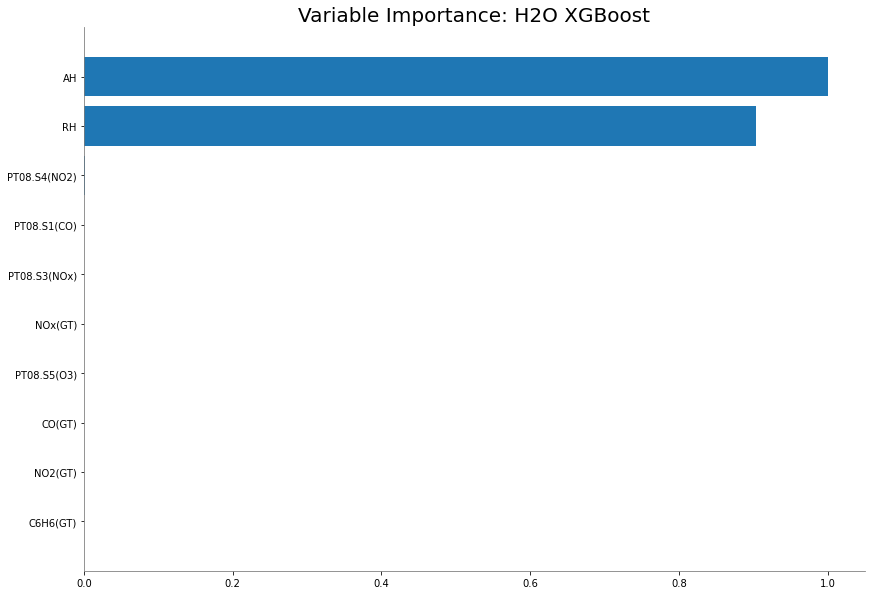

<Figure size 432x288 with 0 Axes>

In [49]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

In the picture above, we can see that AH and RH are the most important factors affecting temperature. But whether these factors are positively, negatively, or more complexly correlated with wealth, we can't tell from the graph above. Nor can we interpret the effect of each feature on the predicted value of each individual.

In [50]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-50-dd7790b8306f>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


In [51]:
#Show the model’s rmse
print(best_model.rmse(train = True))

0.1915250942610689


In [52]:
predictions = best_model.predict(s12_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [53]:
#Show the five prediction value 
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict
0,10.715685
1,8.545078
2,8.188807
3,8.216649
4,10.699400


How AH influence Temperature in the best Model(XGBoost):

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20221204_02045_model_3 on column 'AH'.
ah        mean_response    stddev_response    std_error_mean_response
--------  ---------------  -----------------  -------------------------
0.1847    0.15337          3.60416            0.0432606
0.289747  2.3653           4.61728            0.0554211
0.394795  5.80368          5.72593            0.0687282
0.499842  8.72928          6.00575            0.0720869
0.604889  11.3353          6.34572            0.0761675
0.709937  13.8034          6.33433            0.0760308
0.814984  15.9347          6.67812            0.0801574
0.920032  17.8406          6.6505             0.0798258
1.02508   19.744           6.81558            0.0818073
1.13013   21.3043          6.89259            0.0827316
1.23517   22.743           7.01639            0.0842176
1.34022   24.0275          6.90309            0.0828577
1.44527   25.4052          6.87952            0.0825747
1.55032   26.4

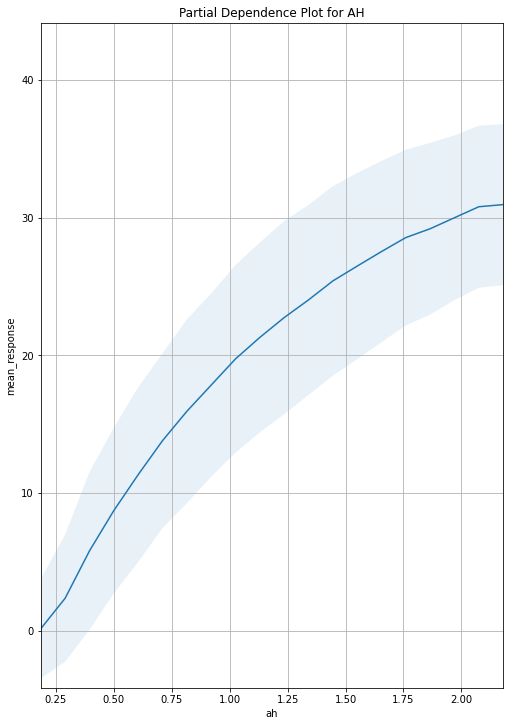

In [54]:
best_model.partial_plot(s12, cols=['AH'])

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20221204_02045_model_3 on column 'RH'.
rh       mean_response    stddev_response    std_error_mean_response
-------  ---------------  -----------------  -------------------------
9.2      39.4223          6.24738            0.0749871
13.3842  37.3469          6.87448            0.0825142
17.5684  33.1678          7.17821            0.0861598
21.7526  29.6371          7.38678            0.0886634
25.9368  26.7287          7.52331            0.0903021
30.1211  24.4147          7.43104            0.0891946
34.3053  22.1728          7.42948            0.0891759
38.4895  20.4263          7.43424            0.089233
42.6737  18.4992          7.09224            0.0851279
46.8579  17.0446          7.14111            0.0857146
51.0421  15.7574          7.01936            0.0842532
55.2263  14.5356          6.83323            0.0820191
59.4105  13.6093          6.76587            0.0812106
63.5947  12.4594          6.69

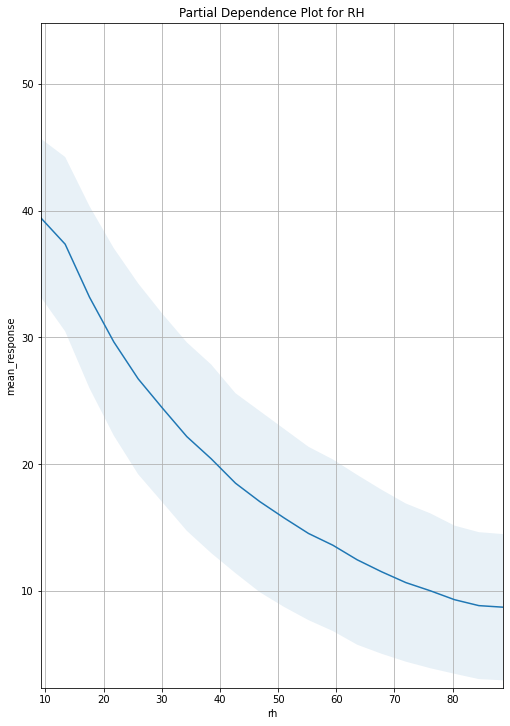

In [55]:
best_model.partial_plot(s12, cols=['RH'])

# 5.Run SHAP analysis on the models above, interpret the SHAP values and compare them with the other model interpretability methods.

**1. SHAP for GLM model**

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

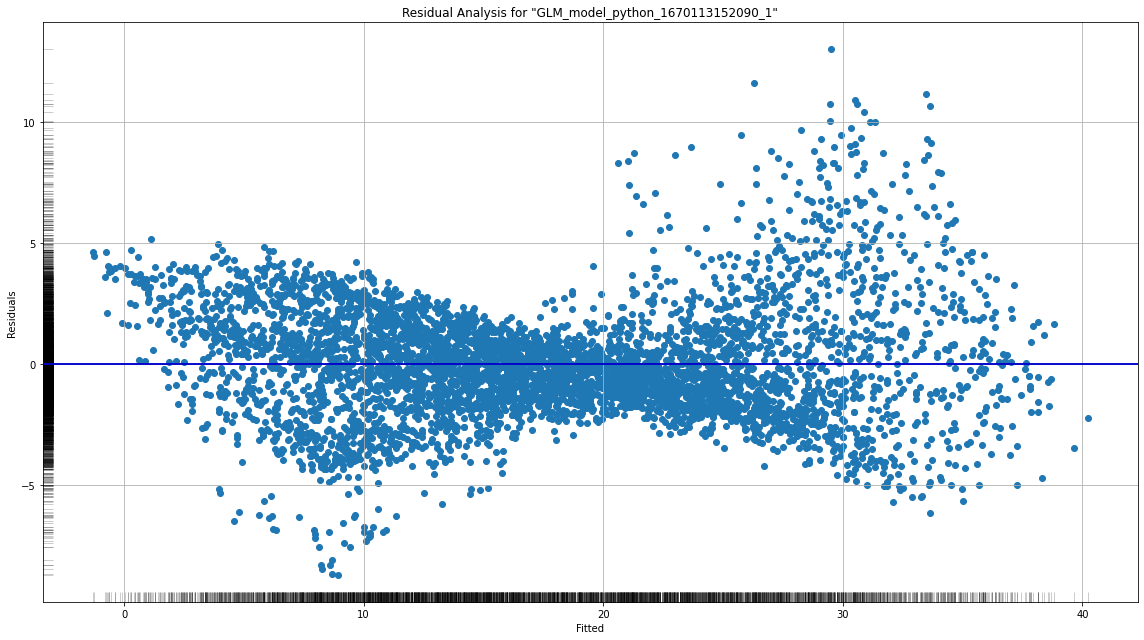

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

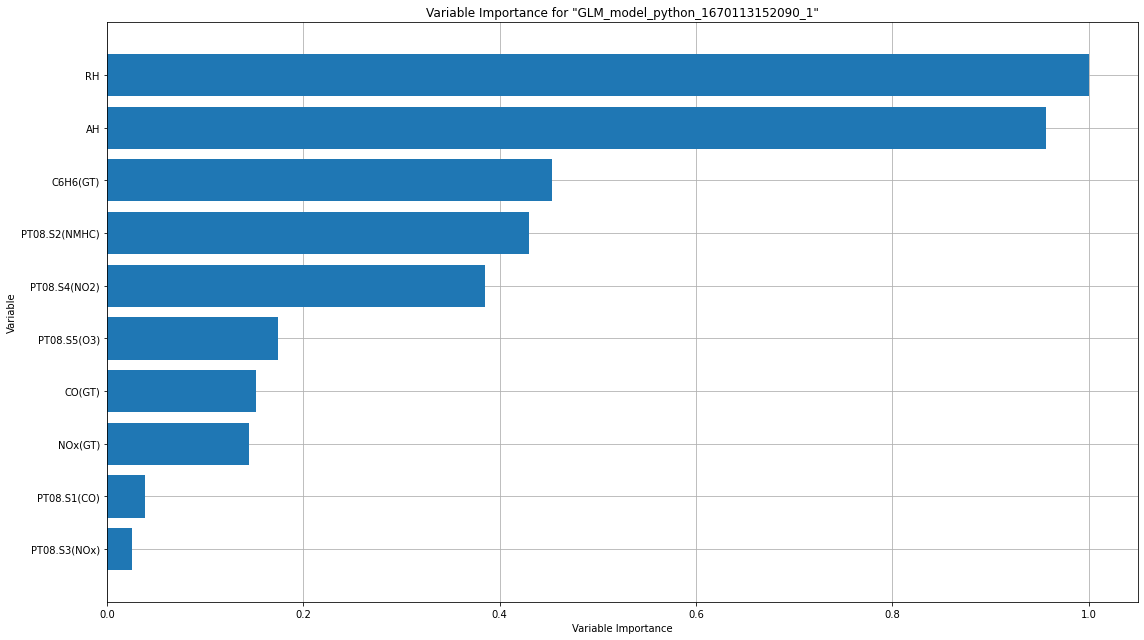

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

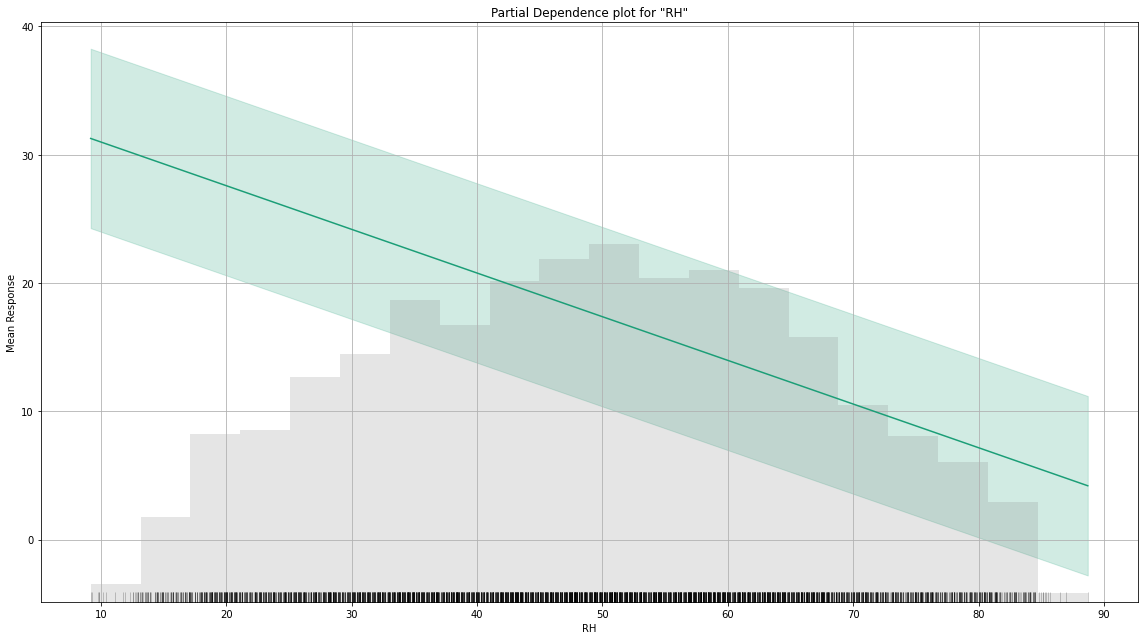

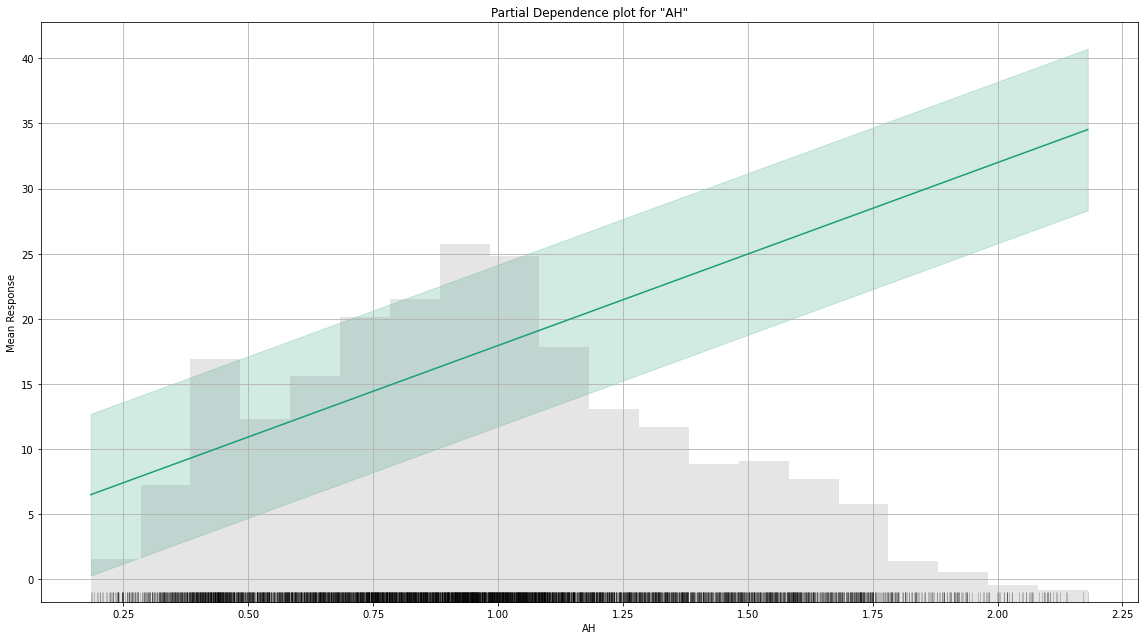

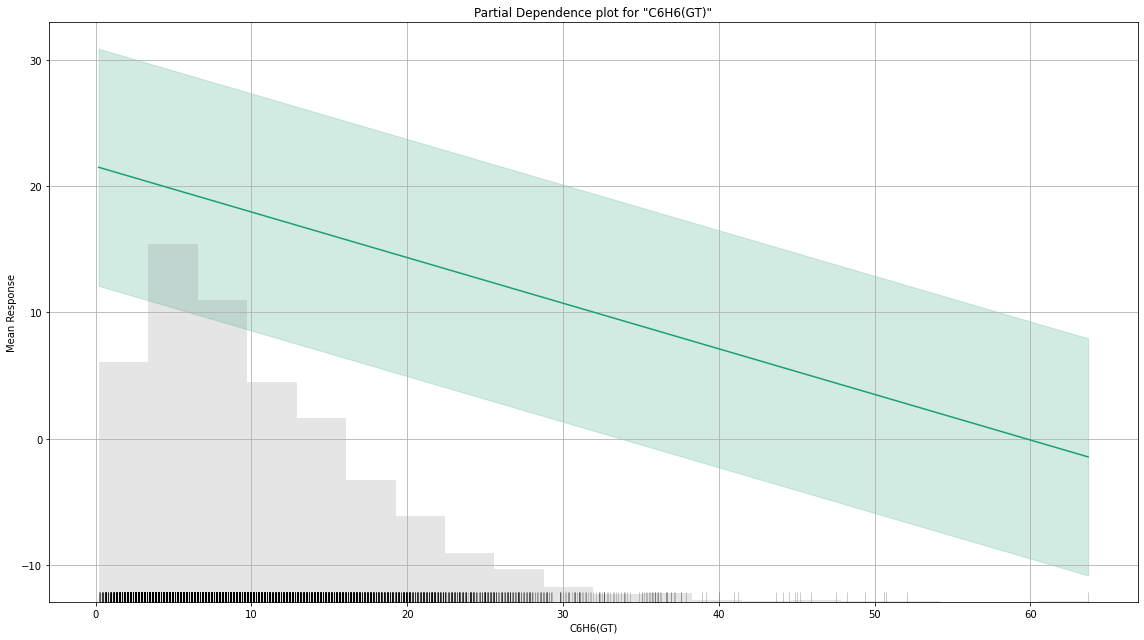

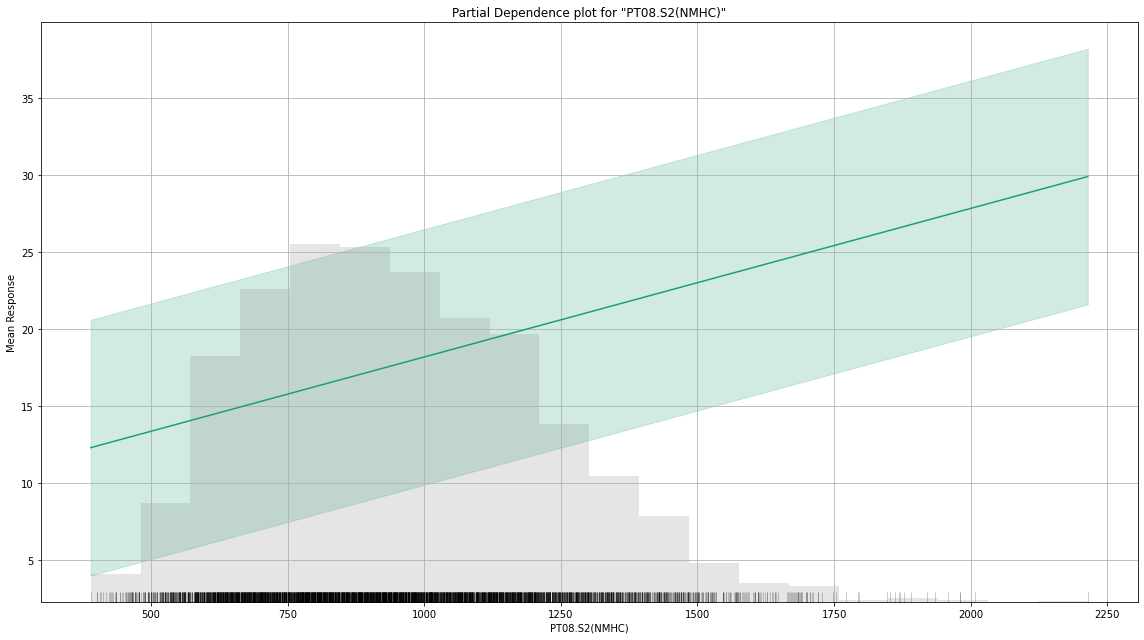

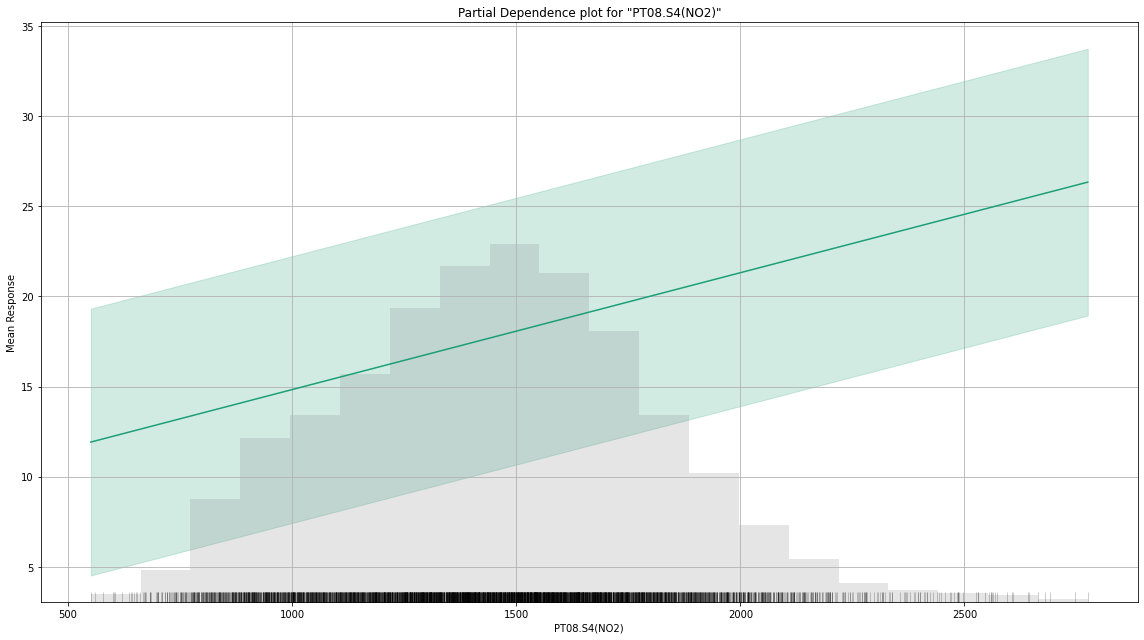

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

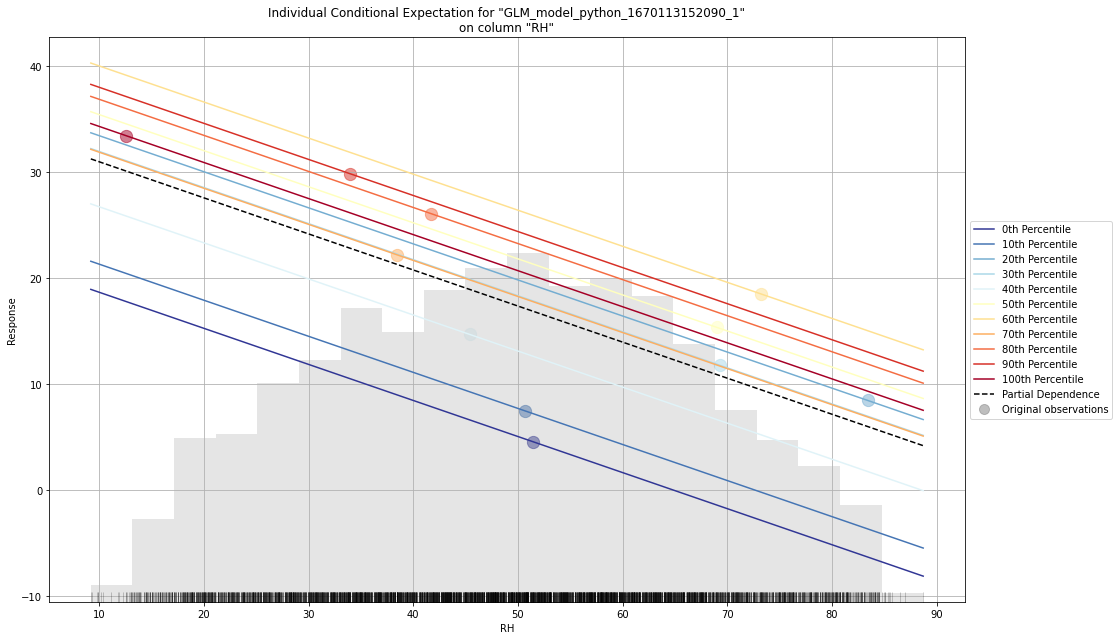

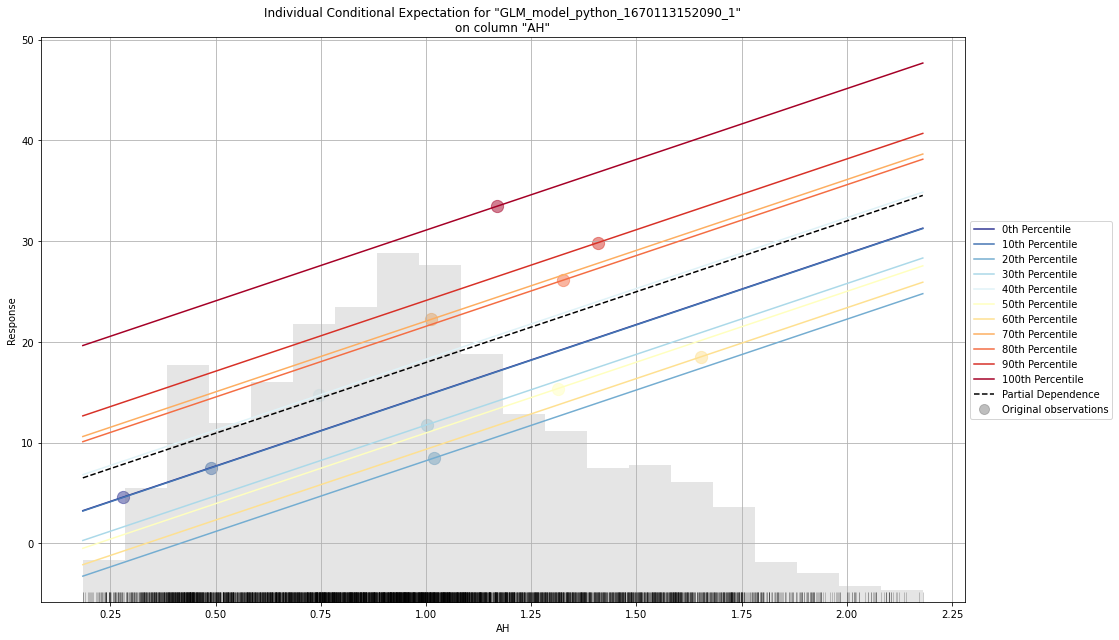

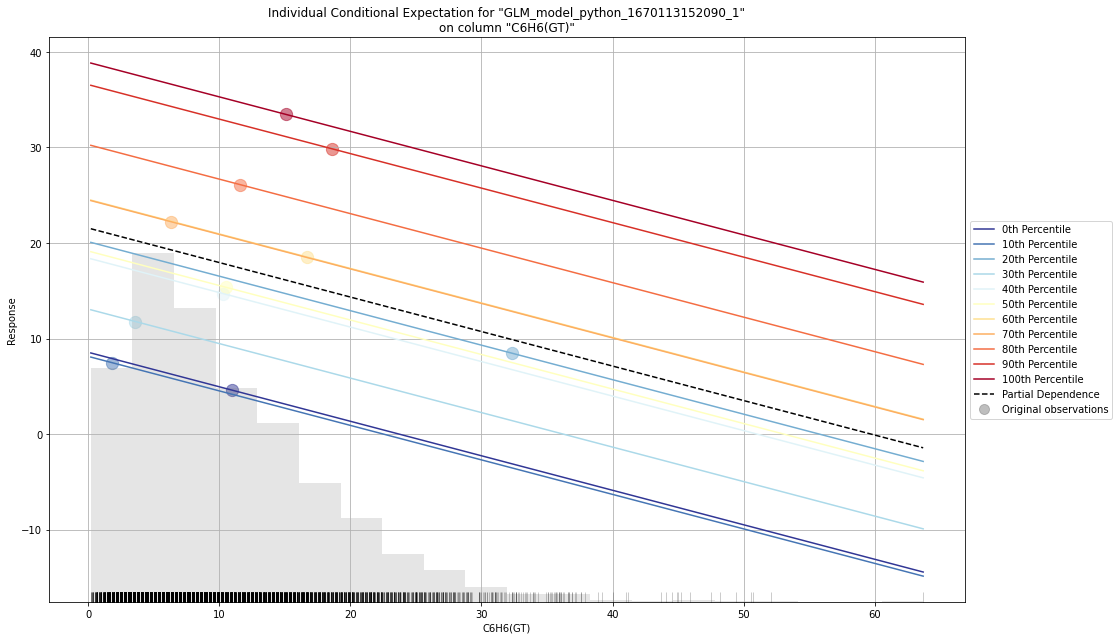

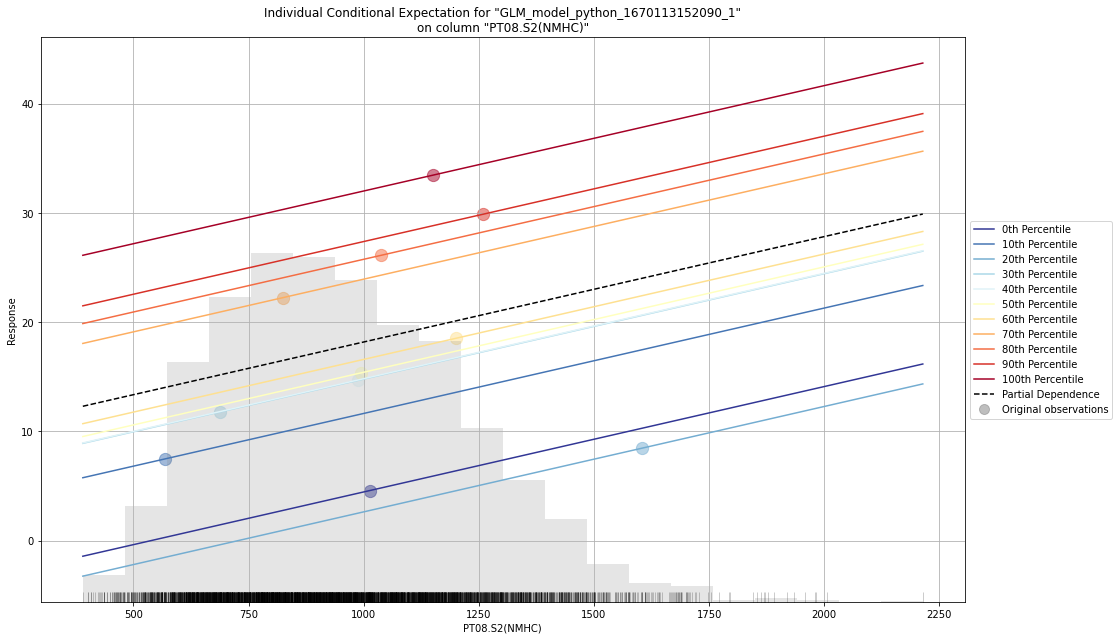

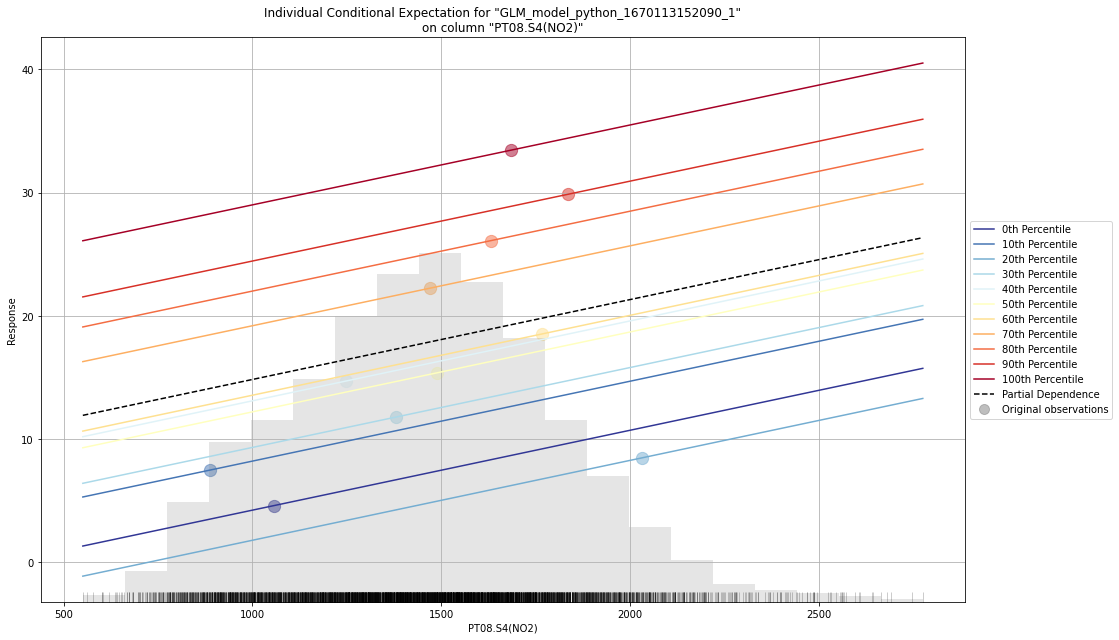

In [57]:
exm = air_glm.explain(s12_train)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data = pd.read_csv("https://raw.githubusercontent.com/ChenPingA/Air-Quality-Data-Set/main/AirQualityUCI.csv")
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']
dt = pd.read_csv("https://raw.githubusercontent.com/ChenPingA/Air-Quality-Data-Set/main/AirQualityUCI.csv",header=None,skiprows=1,names=col)
r=list(np.arange(len(col)))
#Na_values=-100
dt=pd.read_csv("https://raw.githubusercontent.com/ChenPingA/Air-Quality-Data-Set/main/AirQualityUCI.csv",header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-100,usecols=r)

In [60]:
dt.tail(130)
dt.dropna(how='all',inplace=True)
print('Missing values:\n\n',dt.shape[0]-dt.count())
clean=(dt.shape[0]-dt.count()).sum()
print("\n")
if(clean==0):
    print("No Missing Values")

Missing values:

 DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
dtype: int64


No Missing Values


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression

In [62]:
#Let X-input and Y-input features
X=dt.drop(columns=['T','DATE','TIME'])     
Y=dt['T']   
SScaler=StandardScaler()
Xsd=SScaler.fit_transform(X)    #applying stardardisation
X.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888


In [63]:
X_train, X_test, y_train, y_test=train_test_split(Xsd,Y,test_size=0.4, random_state=3)

In [64]:
model= LinearRegression()

In [65]:
model.fit(X_train,y_train)

LinearRegression()

In [66]:
! pip install shap
import shap
# model
explainer = shap.explainers.Linear(model,X_train)
shap_values=explainer(X)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.1 MB/s 


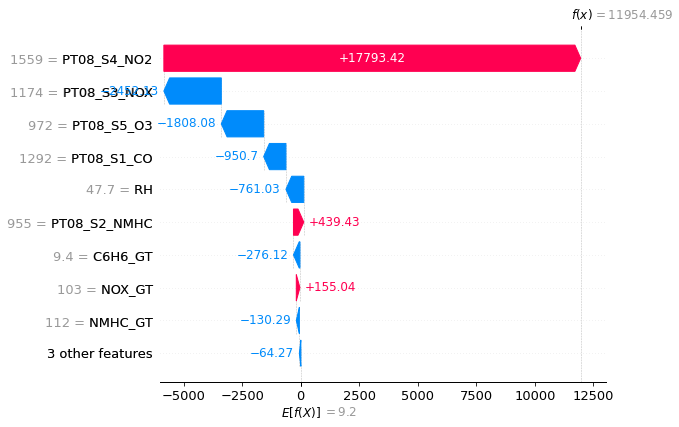

In [67]:
shap.plots.waterfall(shap_values[1])

y->feature

x->shape

red means positive impact

blue means negative impact

**2. SHAP for GBM model**

For each sample, the SHAP value for each of its features, which provides a better understanding of overall patterns and allows the discovery of prediction outliers. Each row represents a feature, and the abscissa is the SHAP value. A point represents a sample, and the color represents the eigenvalue (red high, blue low). For example, this graph shows that higher values ​​of the AH feature higher the predicted temperature

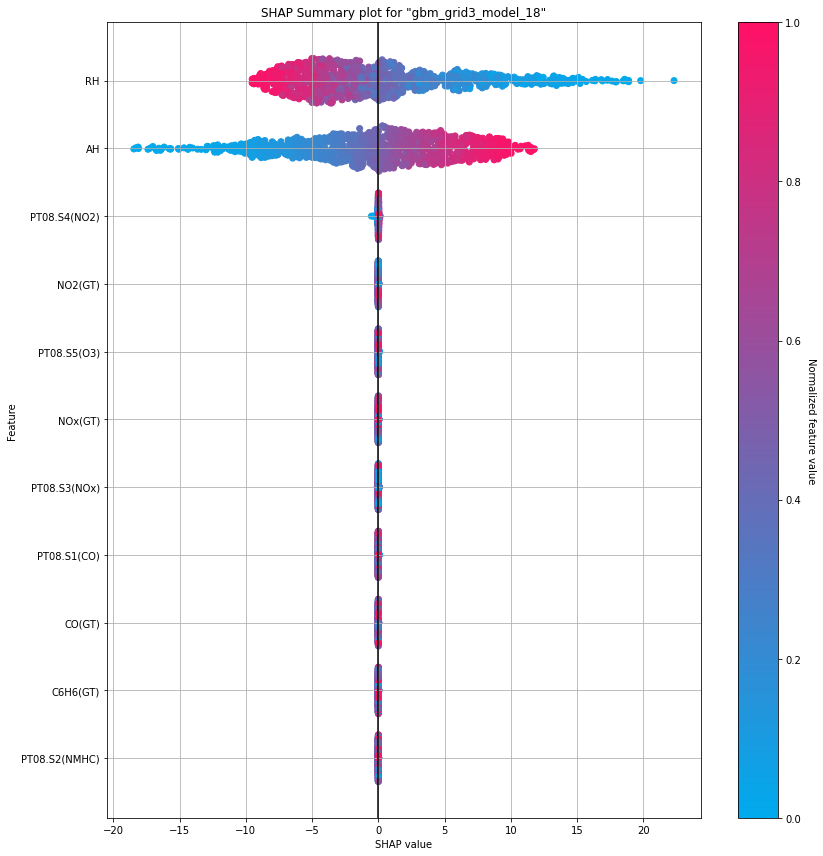

In [68]:
shap_plot = best_gbm3.shap_summary_plot(s12_train)

In [69]:
contribution = best_gbm3.predict_contributions(s12_train)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [70]:
# convert the H2O Frame to use with shap's visualization functions
contribution_matrix = contribution.as_data_frame().to_numpy()
# shap values are calculated for all features
shap_value = contribution_matrix[:,0:11]
# expected values is the last returned column
expected_values = contribution_matrix[:,11].min()
shap.initjs()
shap.force_plot(expected_values,shap_value[0])

Actually, the SHAP of GBM is nearly same as the XGBoost. And all the details show below

**3. SHAP for XGBoost model**

calculate SHAP values using function predict_contributions:

In [72]:
contributions = best_model.predict_contributions(s12_train)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


convert the H2O Frame to use with shap's visualization functions, and then calculate shap value for all features:

In [73]:
# convert the H2O Frame to use with shap's visualization functions
contributions_matrix = contributions.as_data_frame().to_numpy()
# shap values are calculated for all features
shap_values = contributions_matrix[:,0:11]
# expected values is the last returned column
expected_value = contributions_matrix[:,11].min()

In [74]:
shap.initjs()
shap.force_plot(expected_value,shap_values[0])



the average f(x) value of all samples in the figure: 17.77, the sum of the shap value is f(x) -> 14.05



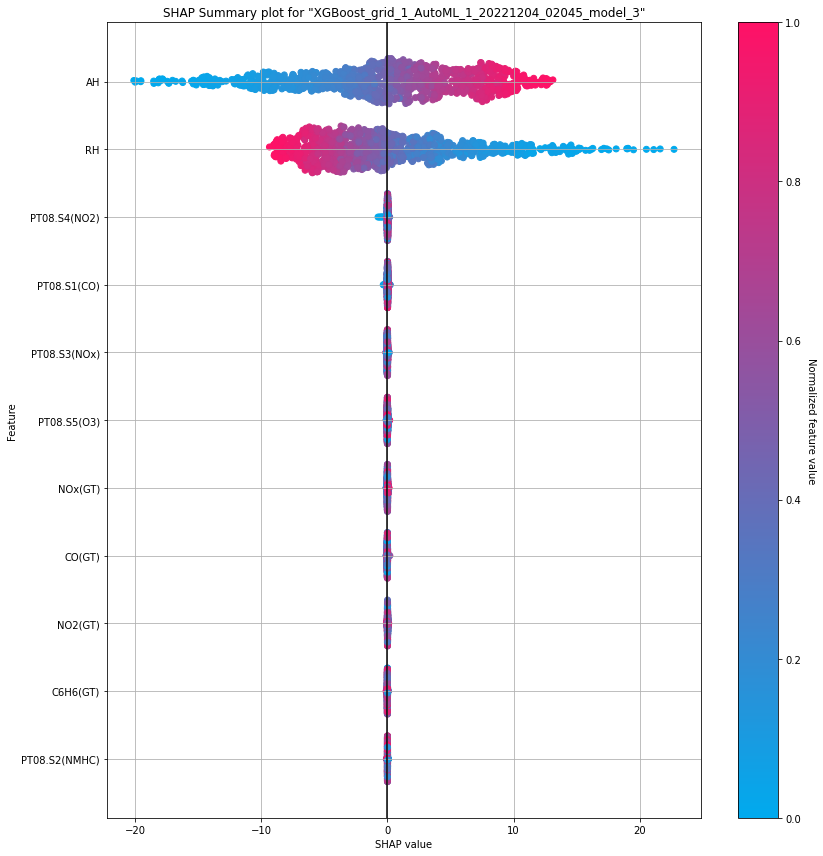

In [75]:
shap_plot = best_model.shap_summary_plot(s12_train)

SHAP provides a method for comparing the importance of independent variables, that is, the average value of the absolute value of the SHAP value of each feature is used as the importance of the feature, and a standard bar chart is obtained

Looking at the picture, we can see that AH and RH have a greater impact on the model, among which the blue points in AH have a negative effect, and the red points have a positive effect. Secondly, the characteristics of AH are relatively scattered.

Except for AH and RH, the shap values of other factors are concentrated at 0, so they have little effect on temperature.

A SHAP interpretation shows the contribution of a particular instance's features. The sum of the feature contribution and the bias term is equal to the model's original prediction, that is, the prediction before applying the reverse link function. H2O implements TreeSHAP. This allows the contribution of features that do not affect predictions to be increased when the features are correlated.

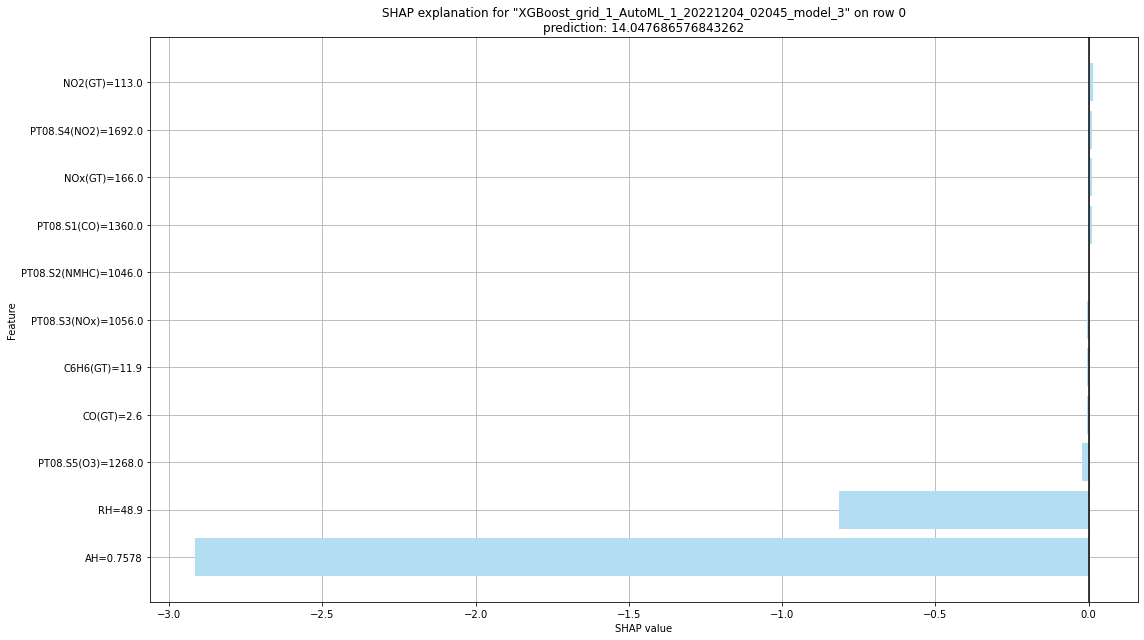

In [76]:
shapr_plot = best_model.shap_explain_row_plot(s12_train, row_index=0)

This is another illustration, it can be clearly seen that AH and RH have a large shap value, and these two factors have an important negative impact on temperature

# Citation:
1.https://blog.csdn.net/qq_43800119/article/details/121187457

2.https://blog.csdn.net/Gin077/article/details/104447461

3.https://blog.dataiku.com/tree-based-models-how-they-work-in-plain-english

4.https://cloud.tencent.com/developer/article/1880798


Copyright (c) [2022] [Ping Chen]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.